In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

import rpy2
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [2]:
# pd.set_option("display.max_columns", None)

In [3]:
cosmx_Liver = sc.read_h5ad("./cosmx_Liver.h5ad")

In [4]:
celltype_ID = pd.DataFrame(cosmx_Liver.obs['cellType'])

In [5]:
health_list = []
cancer_list = []
cell_ID_list = list(celltype_ID.index)
for i in cell_ID_list:
    if int(i.split("_")[1]) == 1:
        x = 1
        y = 0
    else:
        x = 0
        y = 1
    health_list.append(x)
    cancer_list.append(y)
liver = pd.DataFrame({"Health":health_list, "Cancer":cancer_list}, index=list(celltype_ID.index))

In [6]:
liver[liver['Health'] == 1]

,Health,Cancer
c_1_100_10,1,0
c_1_100_1078,1,0
c_1_100_1135,1,0
c_1_100_267,1,0
c_1_100_732,1,0
...,...,...
c_1_9_981,1,0
c_1_9_982,1,0
c_1_9_985,1,0
c_1_9_987,1,0


In [7]:
celltype_ID.cellType.value_counts()

tumor_1                         347988
Hep.4                           125997
Hep.5                            89334
tumor_2                          35385
CD3+.alpha.beta.T.cells          33747
Stellate.cells                   24280
Hep.3                            21274
Inflammatory.macrophages         20679
Non.inflammatory.macrophages     18632
Periportal.LSECs                 17976
Hep.1                            17364
Mature.B.cells                    7902
Central.venous.LSECs              6554
Cholangiocytes                    6194
Hep.6                             6183
gamma.delta.T.cells.1             3730
NK.like.cells                     3457
Antibody.secreting.B.cells        2649
Portal.endothelial.cells          1597
Hep                               1204
Erthyroid.cells                   1183
NotDet                               9
Name: cellType, dtype: int64

In [8]:
# select one celltype:
selected_celltype = "NK.like.cells"
selected_index = celltype_ID[celltype_ID["cellType"] == selected_celltype].index
selected_design = liver.loc[selected_index]

In [9]:
CosMx_Liver = pd.DataFrame(cosmx_Liver.raw.X.A, columns=cosmx_Liver.var.index, index=list(celltype_ID.index))

In [10]:
health_selected_list = []
cancer_selected_list = []
for i in selected_index:
    if int(i.split("_")[1]) == 1:
        health_selected_list.append(i)
    else:
        cancer_selected_list.append(i)
Health_selected_Liver = CosMx_Liver.loc[health_selected_list]
Cancer_selected_Liver = CosMx_Liver.loc[cancer_selected_list]

selected_Liver_data = CosMx_Liver.loc[selected_index]
selected_Liver_data = selected_Liver_data.T


In [23]:
Health_selected_Liver

,AATK,ABL1,ABL2,ACACB,ACE,ACKR1,ACKR3,ACKR4,ACP5,ACTA2,...,WNT7A,WNT7B,WNT9A,XBP1,XCL1,XKR4,YBX3,YES1,ZBTB16,ZFP36
c_1_101_981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
c_1_121_158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
c_1_121_355,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
c_1_139_146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
c_1_142_666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_1_9_1217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
c_1_9_1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_9_445,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,2.0
c_1_9_462,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# len(Health_selected_Liver), len(Cancer_selected_Liver)
selected_design

,Health,Cancer
c_1_101_981,1,0
c_1_121_158,1,0
c_1_121_355,1,0
c_1_139_146,1,0
c_1_142_666,1,0
...,...,...
c_2_91_1232,0,1
c_2_91_587,0,1
c_2_93_968,0,1
c_2_96_505,0,1


In [12]:
selected_Liver_data

,c_1_101_981,c_1_121_158,c_1_121_355,c_1_139_146,c_1_142_666,c_1_145_898,c_1_161_626,c_1_184_552,c_1_226_379,c_1_237_510,...,c_2_85_971,c_2_86_287,c_2_86_391,c_2_8_652,c_2_90_846,c_2_91_1232,c_2_91_587,c_2_93_968,c_2_96_505,c_2_98_724
AATK,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABL1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ABL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACACB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKR4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YBX3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YES1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZBTB16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
limma = importr("limma")
contrast_matrix = limma.makeContrasts("Health-Cancer", levels = selected_design)
contrast_matrix

array([[ 1.],
       [-1.]])

In [14]:
exp = selected_Liver_data

In [15]:
rdf1 = pandas2ri.py2rpy(exp)
rdf2 = pandas2ri.py2rpy(selected_design)
from rpy2.robjects import globalenv
globalenv['rdf1']=rdf1
globalenv['rdf2']=rdf2
rscript='''
contrasts_matrix<-makeContrasts("Health-Cancer",levels=rdf2)

fit<-lmFit(rdf1,rdf2)
fit2<-contrasts.fit(fit,contrasts_matrix)
fit2<-eBayes(fit2)
temp<-topTable(fit2,coef=1,n=Inf)
nrDEG=na.omit(temp)
'''
r(rscript)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
TTR,2.636704,2.175586,18.241351,4.706576e-71,4.706576e-68,150.812904
APOA1,4.090226,3.495806,17.257307,4.429136e-64,2.214568e-61,134.889988
HSPA1A,2.724651,2.393115,16.524362,4.268242e-59,1.422747e-56,123.513334
APOC1,2.626125,2.812554,14.477672,3.658448e-46,9.146120e-44,94.008783
SERPINA1,2.426528,2.649407,13.289510,2.417663e-39,4.835325e-37,78.464321
...,...,...,...,...,...,...
GPR183,0.000022,0.015620,0.004226,9.966281e-01,9.975753e-01,-7.237123
TSHZ2,0.000031,0.045415,0.003440,9.972552e-01,9.975753e-01,-7.237126
CD93,0.000050,0.105004,0.003435,9.972593e-01,9.975753e-01,-7.237126
ITGAE,0.000031,0.045415,0.003194,9.974519e-01,9.975753e-01,-7.237127


In [16]:
result=r(rscript)   ##赋值给新的变量，方便后面调用
fold_cutoff=1
adjp_cutoff=0.05
 
list3=[]   #准备一个列表来装接下来差异条件遍历的结果
normal_list=[]  ##装没有显著差异的symbol ID
for j in range(0,len(result.index)):
    if (abs(result['logFC'][j])>=fold_cutoff) and (result['adj.P.Val'][j]<=adjp_cutoff):
        list3.append(j)
    else:
        normal_list.append(result.index.tolist()[j])
print("差异表达基因的数量：",len(list3))
print("差异不显著基因的数量：",len(normal_list))
 

差异表达基因的数量： 6
差异不显著基因的数量： 994


In [17]:
up_list=[]   # up-reguated gene id list
for h1 in range(0,len(result.index)):
    if (result['logFC'][h1]>=fold_cutoff) and (result['adj.P.Val'][h1]<=adjp_cutoff):
        up_list.append(result.index.tolist()[h1])
down_list=[]  # down-regulated gene id list
for h2 in range(0,len(result.index)):
    if (result['logFC'][h2]<-(fold_cutoff)) and (result['adj.P.Val'][h2]<=adjp_cutoff):
        down_list.append(result.index.tolist()[h2])
print("the number of up-regulated genes:",len(up_list))
print("the number of down-regulated genes",len(down_list))
print("the number of differentially expressed genes:",len(up_list)+len(down_list))
DEG_up=exp[exp.index.isin(up_list)]
DEG_down=exp[exp.index.isin(down_list)]
print("the dimsension of up-regulated genes:",DEG_up.shape)
print("the dimsension of down-regulated genes",DEG_down.shape)
DEG_up['up/down']=['up']*len(DEG_up) #添加标签
DEG_down['up/down']=['down']*len(DEG_down) #添加标签
DEG_matrix=pd.concat([DEG_up,DEG_down],join='inner')   ##合并
DEG_matrix
# DEG_matrix.to_excel("Lung.xlsx",index=True)   #保存下来

the number of up-regulated genes: 5
the number of down-regulated genes 1
the number of differentially expressed genes: 6
the dimsension of up-regulated genes: (5, 3457)
the dimsension of down-regulated genes (1, 3457)


,c_1_101_981,c_1_121_158,c_1_121_355,c_1_139_146,c_1_142_666,c_1_145_898,c_1_161_626,c_1_184_552,c_1_226_379,c_1_237_510,...,c_2_86_287,c_2_86_391,c_2_8_652,c_2_90_846,c_2_91_1232,c_2_91_587,c_2_93_968,c_2_96_505,c_2_98_724,up/down
APOA1,0.0,4.0,15.0,2.0,1.0,4.0,0.0,13.0,0.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,up
APOC1,1.0,1.0,3.0,2.0,5.0,3.0,1.0,7.0,0.0,2.0,...,6.0,0.0,3.0,0.0,1.0,1.0,9.0,0.0,1.0,up
HSPA1A,2.0,4.0,7.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,up
SERPINA1,2.0,3.0,8.0,1.0,2.0,5.0,3.0,2.0,4.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.0,0.0,1.0,up
TTR,1.0,5.0,6.0,0.0,2.0,3.0,0.0,4.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,up
MALAT1,1.0,9.0,3.0,0.0,1.0,12.0,5.0,3.0,2.0,4.0,...,2.0,5.0,9.0,7.0,2.0,14.0,21.0,6.0,1.0,down


In [18]:
result['adj.P.Val_log']=-np.log10(result['adj.P.Val'])   #将adj.P.Val列的值全部负对数转换
result['sig']='normal'    #新设一列sig全部为normal
result.loc[(result['logFC']>=1)&(result['adj.P.Val']<0.05),'sig']='up'   #上调基因sig将normal替换为up
result.loc[(result['logFC']<-1)&(result['adj.P.Val']<0.05),'sig']='down'  ##上调基因sig将normal替换为down     
result

,logFC,AveExpr,t,P.Value,adj.P.Val,B,adj.P.Val_log,sig
TTR,2.636704,2.175586,18.241351,4.706576e-71,4.706576e-68,150.812904,67.327295,up
APOA1,4.090226,3.495806,17.257307,4.429136e-64,2.214568e-61,134.889988,60.654711,up
HSPA1A,2.724651,2.393115,16.524362,4.268242e-59,1.422747e-56,123.513334,55.846872,up
APOC1,2.626125,2.812554,14.477672,3.658448e-46,9.146120e-44,94.008783,43.038763,up
SERPINA1,2.426528,2.649407,13.289510,2.417663e-39,4.835325e-37,78.464321,36.315574,up
...,...,...,...,...,...,...,...,...
GPR183,0.000022,0.015620,0.004226,9.966281e-01,9.975753e-01,-7.237123,0.001054,normal
TSHZ2,0.000031,0.045415,0.003440,9.972552e-01,9.975753e-01,-7.237126,0.001054,normal
CD93,0.000050,0.105004,0.003435,9.972593e-01,9.975753e-01,-7.237126,0.001054,normal
ITGAE,0.000031,0.045415,0.003194,9.974519e-01,9.975753e-01,-7.237127,0.001054,normal


In [19]:
DEG_result = result[result["sig"] != 'normal']
DEG_result

,logFC,AveExpr,t,P.Value,adj.P.Val,B,adj.P.Val_log,sig
TTR,2.636704,2.175586,18.241351,4.706576e-71,4.706576e-68,150.812904,67.327295,up
APOA1,4.090226,3.495806,17.257307,4.429136e-64,2.214568e-61,134.889988,60.654711,up
HSPA1A,2.724651,2.393115,16.524362,4.268242e-59,1.422747e-56,123.513334,55.846872,up
APOC1,2.626125,2.812554,14.477672,3.658448e-46,9.146120e-44,94.008783,43.038763,up
SERPINA1,2.426528,2.649407,13.289510,2.417663e-39,4.835325e-37,78.464321,36.315574,up
MALAT1,-1.892902,3.959792,-9.961964,4.560582e-23,3.508140e-21,41.446974,20.454923,down


In [ ]:
# import seaborn as sns   #导入seaborn来画

# ##先设置一下颜色
# colors=["#01c5c4","#ff414d","#686d76"]
# sns.set_palette(sns.color_palette(colors))
 
# #绘图
# ax=sns.scatterplot(x='logFC',y='adj.P.Val_log',data=result,
#                    hue='sig',#颜色映射
#                    edgecolor=None,#点边界颜色
#                    s=10,#点大小
#                   )
# #标签
# ax.set_title("vocalno")
# ax.set_xlabel("logFC")
# ax.set_ylabel("-log10(adj.P.Val)")
 
# #图例
# ax.legend(loc='upper left',bbox_to_anchor=(0.95,0.76),ncol=1)

In [20]:
DEG_up = result[result["sig"] == "up"]
DEG_up_6 = DEG_up.head(6)
# DEG_down = DEG_result[DEG_result["sig"] == "down"]
# DEG_down = DEG_down.head(6)

In [21]:
data_plotter = []
for gene in DEG_up_6.index:
    data_plotter.append(Health_selected_Liver[gene].values)
    data_plotter.append(Cancer_selected_Liver[gene].values)

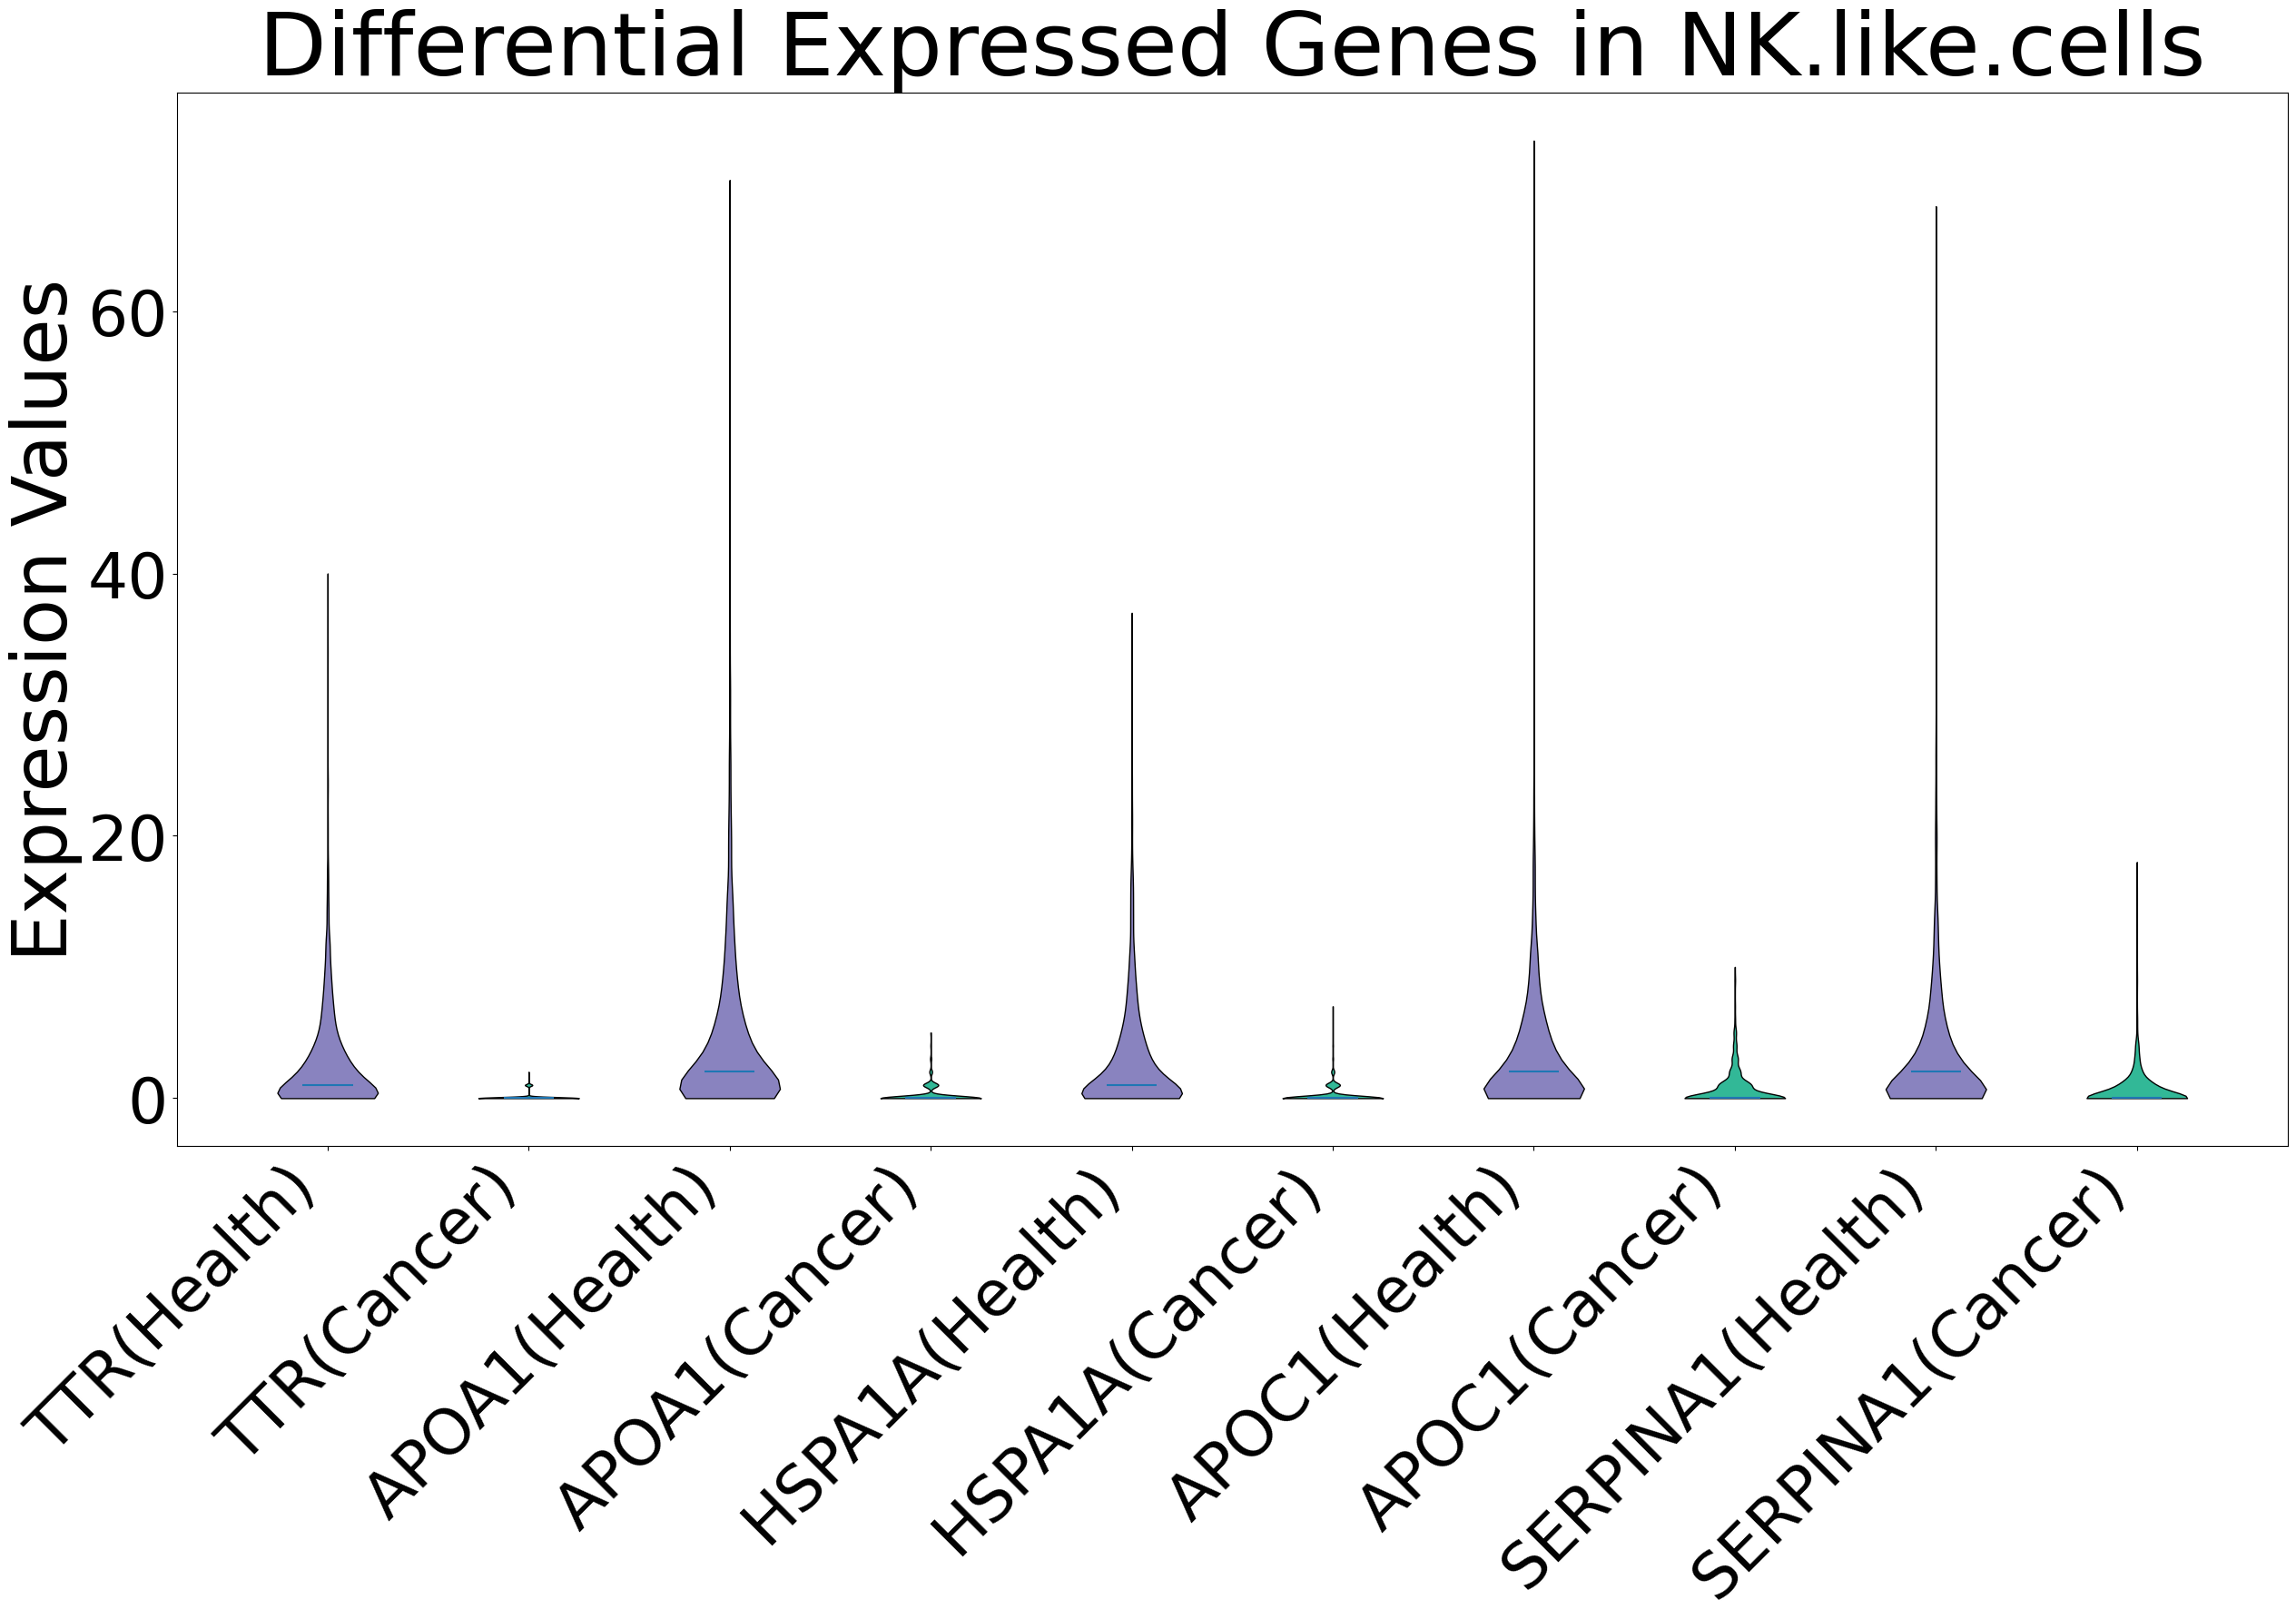

In [22]:
import matplotlib.pyplot as plt
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation = 45, fontsize = 50,  ha='right')
    ax.set_xlim(0.25, len(labels) + 0.75)
    # ax.set_ylabel('Y Axis', fontsize=14)
    # ax.set_yticks(fontsize = 10)
    ax.tick_params(axis='y', labelsize=50)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20), sharey=True)
ax.set_ylabel("Expression Values", fontsize= 60)
ax.set_title("Differential Expressed Genes in %s"%(selected_celltype), fontsize= 70)
parts = ax.violinplot(
    data_plotter, showmeans=False, showmedians=True,
    showextrema=False
)
for i in range(len(parts['bodies'])):
    if i % 2 == 0:
        parts['bodies'][i].set_facecolor('#8983BF') 
    else:
        parts['bodies'][i].set_facecolor('#32B897') 
    parts['bodies'][i].set_edgecolor('black')
    parts['bodies'][i].set_alpha(1)
labels = []
for gene in DEG_up_6.index:
    labels.append(gene+str("(Health)"))
    labels.append(gene+str("(Cancer)"))



set_axis_style(ax, labels)
plt.subplots_adjust(bottom=0.30, wspace=0.05)
# plt.savefig("Liver_Health_Cancer_%s_up.pdf"%(selected_celltype))
plt.show()